In [3]:
import shutil
import os

zip_path = "archive (7).zip"
extract_path = "fashion_product_dataset_unzip"

if not os.path.exists(extract_path):
    shutil.unpack_archive(zip_path, extract_path)

print("✅ Extraction complete to:", extract_path)


✅ Extraction complete to: fashion_product_dataset_unzip


In [1]:
#import all packages
import os
import numpy as np
import pandas as pd
import cv2 as cv
from pathlib import Path
import warnings
from skimage.feature import hog
import tqdm

warnings.filterwarnings("ignore")
pd.options.display.max_columns = None

C:\Users\garva\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\garva\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  "cipher": algorithms.TripleDES,
C:\Users\garva\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 45.0.0.
  "class": algorithms.Blowfish,
C:\Users\garva\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Tri

In [2]:
#define paths and read data

# Define root folder (no "../input" needed for local path)
root = 'fashion_product_dataset_unzip'
style_file = 'styles.csv'
image_folder = f'{root}/images'  # Adjust if folder name differs

# Load styles.csv
csv_path = Path(root) / style_file
print(f"Loading CSV from: {csv_path}")

# Use on_bad_lines='skip' (not error_bad_lines) for recent pandas
styles = pd.read_csv(csv_path, on_bad_lines='skip')

# Optional: check data
styles.head()


Loading CSV from: fashion_product_dataset_unzip\styles.csv


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [3]:
#style file
print("Style shape: ", str(styles.shape))
styles.head()

Style shape:  (44424, 10)


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [4]:
styles.nunique()

id                    44424
gender                    5
masterCategory            7
subCategory              45
articleType             143
baseColour               46
season                    4
year                     13
usage                     8
productDisplayName    31121
dtype: int64

## Distribution of the columns

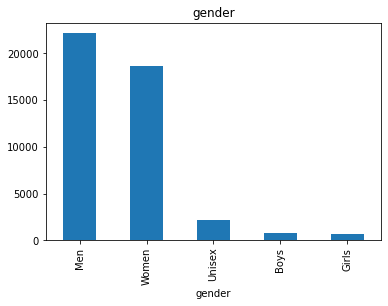

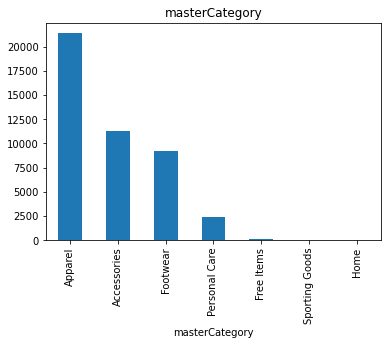

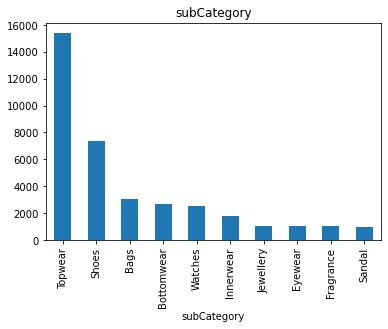

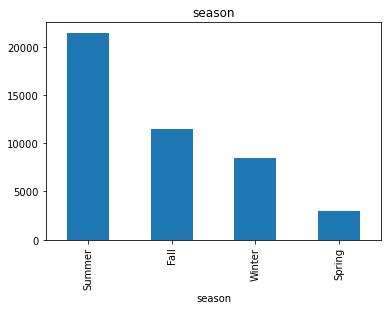

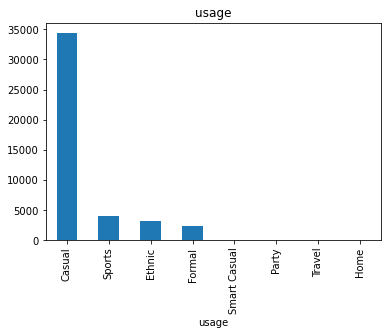

In [5]:
import matplotlib.pyplot as plt
from tqdm import tqdm
categories = ['gender','masterCategory','subCategory','season','usage']
for cat in categories:
    df_cat = styles.groupby(cat,as_index=False).size().sort_values(ascending=False).head(10)
    df_cat.plot(kind='bar',title = cat)
    plt.show()

## Load Images

In [6]:
import cv2 as cv
from tqdm import tqdm

all_images = []

def load_image(ids, path=image_folder):
    img_path = os.path.join(path, ids + '.jpg')
    img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)  # Load in grayscale
    return img, ids

# Loop through image IDs
for ids in tqdm(list(styles.id)[:20000]):
    img, ids = load_image(str(ids))
    if img is not None:
        all_images.append([img, int(ids)])

print(f"✅ Loaded {len(all_images)} images")

100%|████████████████████████████████████████████████████████████████████████████| 20000/20000 [06:03<00:00, 55.09it/s]

✅ Loaded 19998 images


In [7]:
# np.array(all_images[0])

## Resize Images

In [7]:
def resize_image(img,ids):
    return cv.resize(img, (60, 80),interpolation =cv.INTER_LINEAR)
    
all_images_resized = [[resize_image(x,y),y] for x,y in all_images]
len(all_images_resized)

19998

In [8]:
styles.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [9]:
[styles.masterCategory.value_counts().index]

[Index(['Apparel', 'Accessories', 'Footwear', 'Personal Care', 'Free Items',
        'Sporting Goods', 'Home'],
       dtype='object', name='masterCategory')]

## Check distribution of the classes

In [10]:
df_labels = pd.DataFrame(all_images_resized,columns=['image','id'])

target = 'masterCategory'
categories = ['Apparel', 'Accessories', 'Footwear', 'Personal Care', 'Free Items']
df_train = styles[styles[target].isin(categories)][['id',target]]

df_labels = pd.merge(df_labels,df_train,how='left',on=['id'])
df_labels = df_labels.fillna('Others')
df_labels['class'] = pd.factorize(df_labels[target])[0]
print("Data Shape: ", str(df_labels.shape))
print(df_labels[target].value_counts())

Data Shape:  (19998, 4)
masterCategory
Apparel          9675
Accessories      5079
Footwear         4121
Personal Care    1072
Free Items         41
Others             10
Name: count, dtype: int64


In [11]:
#mapper for targets and labels
mapper = df_labels[['class',target]].drop_duplicates()

## FAST detected Features

(80, 60)
Total Keypoints with nonmaxSuppression: 44


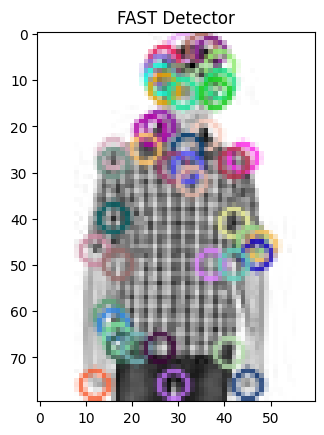

(80, 60)
Total Keypoints with nonmaxSuppression: 31


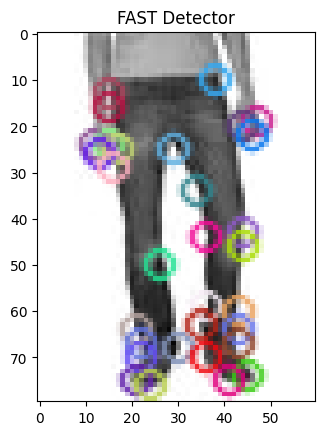

(80, 60)
Total Keypoints with nonmaxSuppression: 14


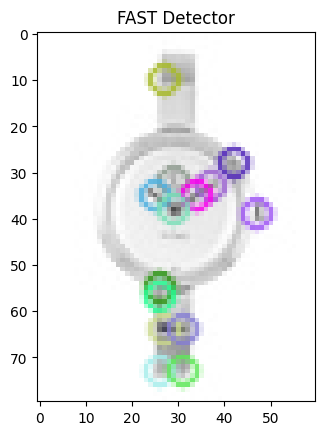

(80, 60)
Total Keypoints with nonmaxSuppression: 22


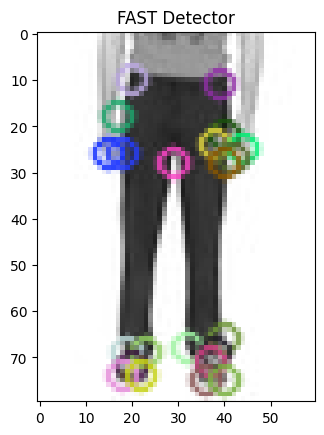

(80, 60)
Total Keypoints with nonmaxSuppression: 43


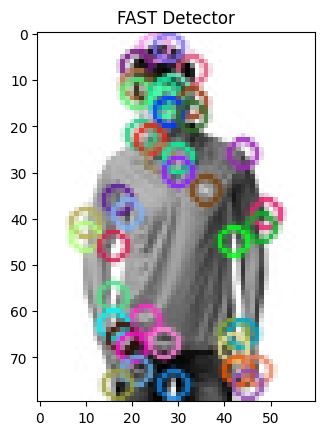

(80, 60)
Total Keypoints with nonmaxSuppression: 39


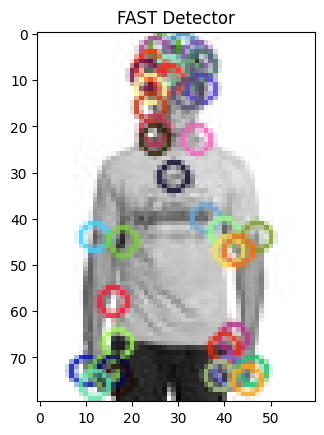

(80, 60)
Total Keypoints with nonmaxSuppression: 45


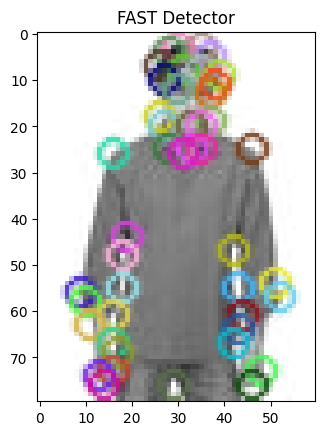

(80, 60)
Total Keypoints with nonmaxSuppression: 24


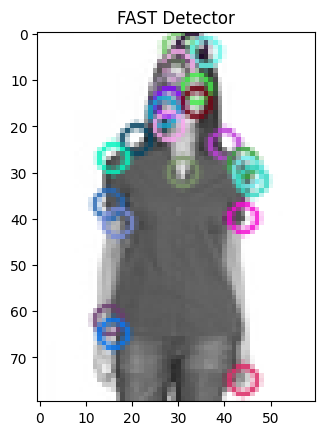

(80, 60)
Total Keypoints with nonmaxSuppression: 19


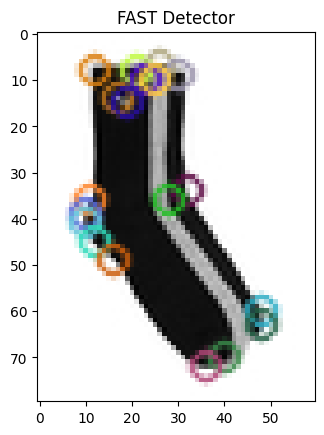

(80, 60)
Total Keypoints with nonmaxSuppression: 13


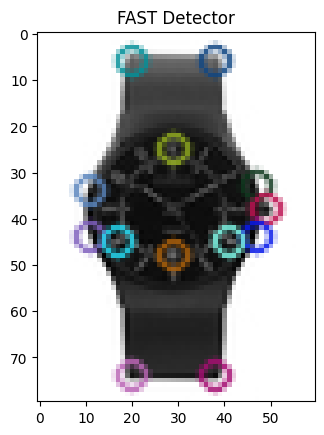

(80, 60)
Total Keypoints with nonmaxSuppression: 23


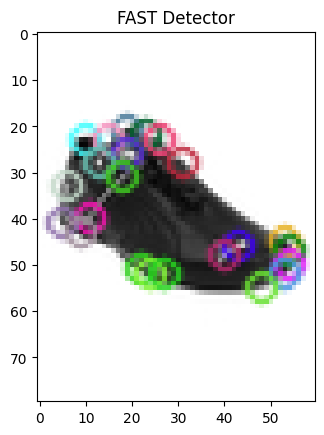

(80, 60)
Total Keypoints with nonmaxSuppression: 23


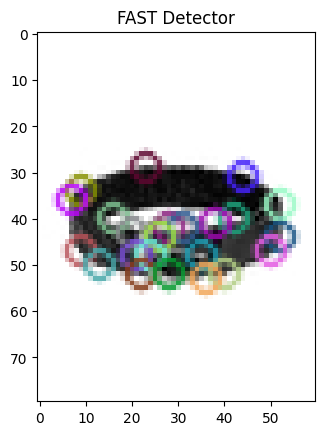

(80, 60)
Total Keypoints with nonmaxSuppression: 14


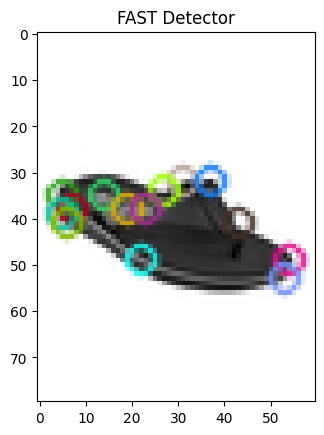

(80, 60)
Total Keypoints with nonmaxSuppression: 60


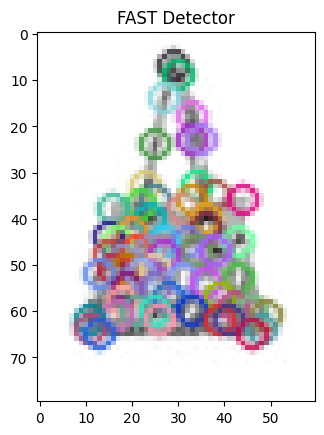

(80, 60)
Total Keypoints with nonmaxSuppression: 20


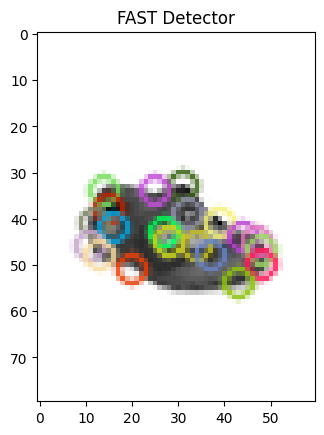

(80, 60)
Total Keypoints with nonmaxSuppression: 10


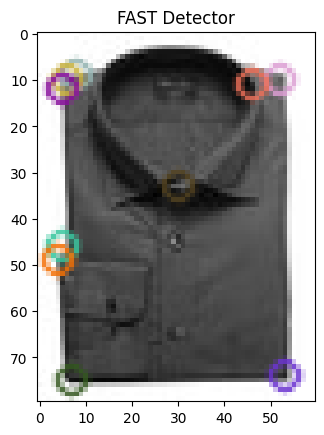

(80, 60)
Total Keypoints with nonmaxSuppression: 56


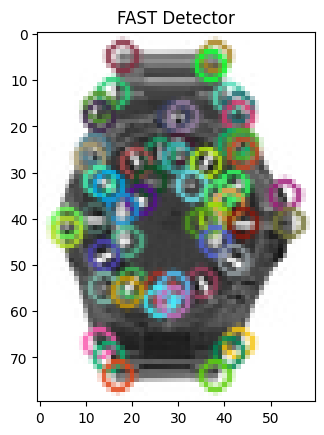

(80, 60)
Total Keypoints with nonmaxSuppression: 27


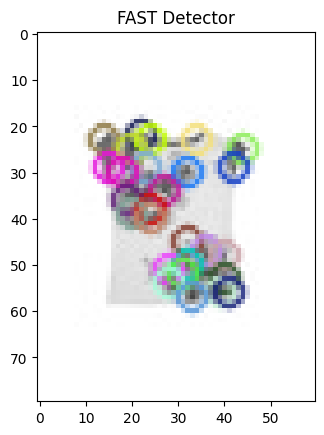

(80, 60)
Total Keypoints with nonmaxSuppression: 37


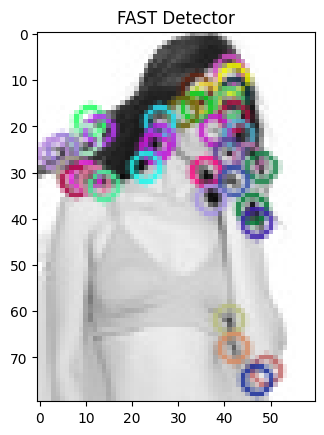

(80, 60)
Total Keypoints with nonmaxSuppression: 39


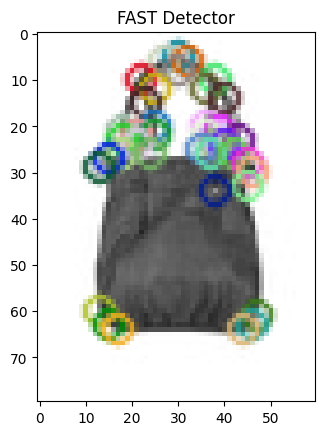

In [13]:
import matplotlib.pyplot as plt
for image in df_labels.image[:20]:
    print(image.shape)
    plt.imshow(image)
    fast = cv.FastFeatureDetector_create(50)
    kp = fast.detect(image,None)
    img2 = cv.drawKeypoints(image, kp, None, color=(255,0,0))
    # Print all default params
    #print( "Threshold: {}".format(fast.getThreshold()) )
    #print( "neighborhood: {}".format(fast.getType()) )
    print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)))
    fast_image=cv.drawKeypoints(image,kp,image)
    plt.imshow(fast_image);plt.title('FAST Detector')
    plt.show()

In [14]:
train_images = np.stack(df_labels.image.values,axis=0)
n_samples = len(train_images)
data_images = train_images.reshape((n_samples, -1))

In [15]:
ppcr = 8
ppcc = 8
hog_images = []
hog_features = []
for image in tqdm(train_images):
    blur = cv.GaussianBlur(image,(5,5),0)
    fd,hog_image = hog(blur, orientations=8, pixels_per_cell=(ppcr,ppcc),cells_per_block=(2,2),block_norm= 'L2',visualize=True)
    hog_images.append(hog_image)
    hog_features.append(fd)

hog_features = np.array(hog_features)

hog_features.shape

100%|████████████████████████████████████████████████████████████████████████████| 19998/19998 [10:00<00:00, 33.30it/s]


(19998, 1728)

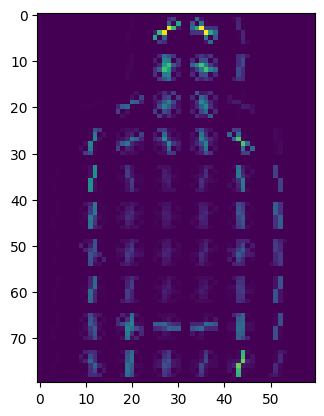

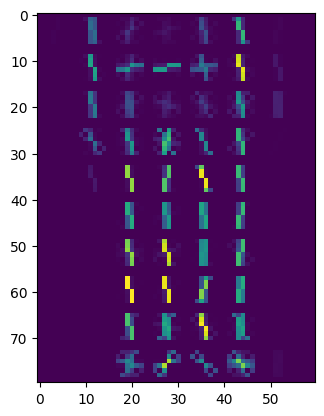

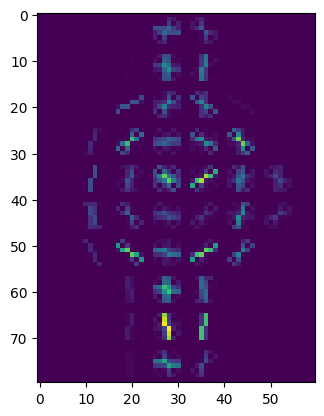

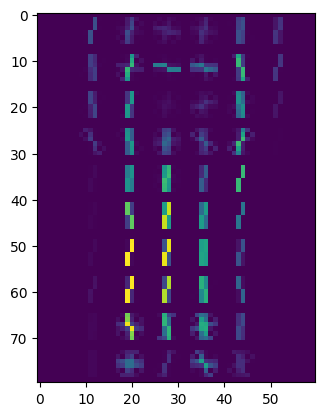

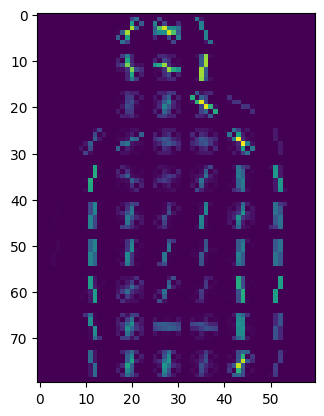

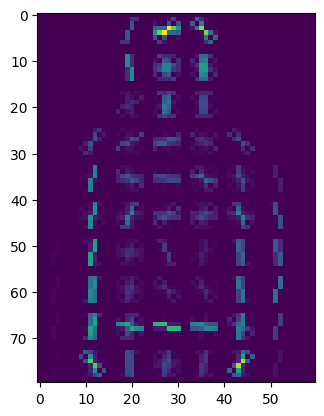

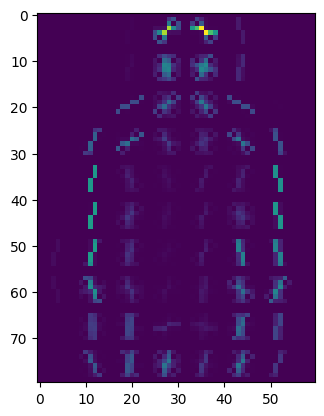

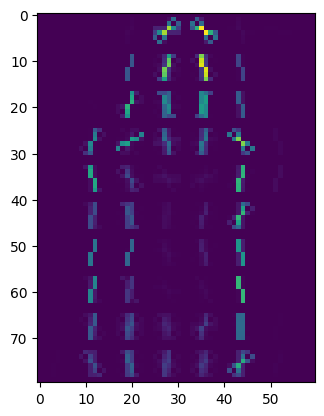

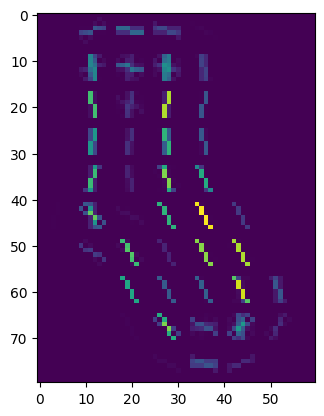

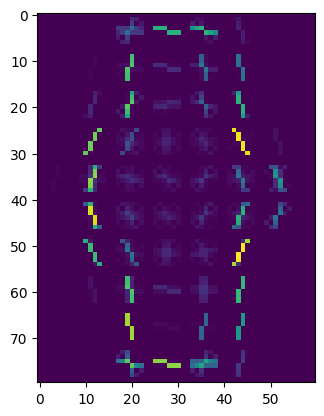

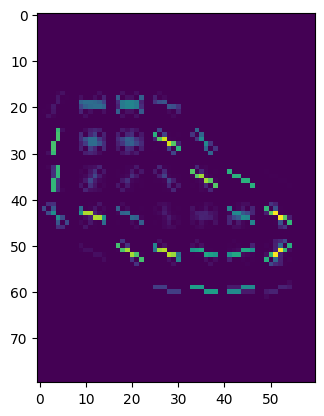

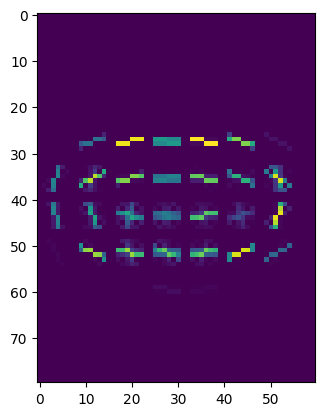

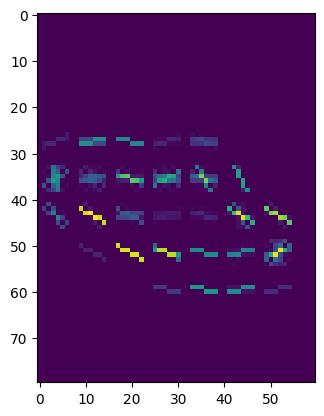

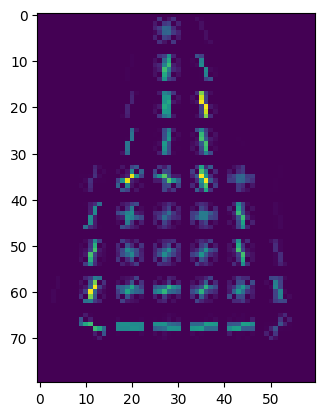

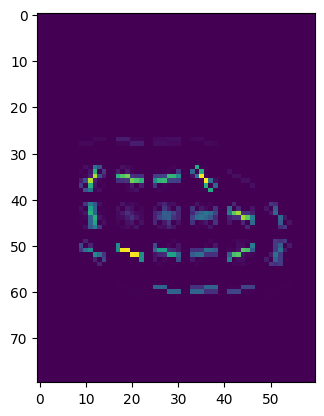

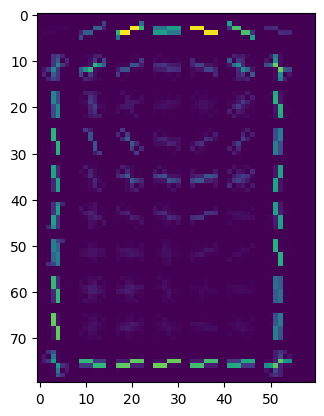

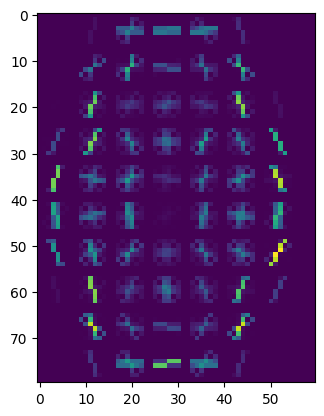

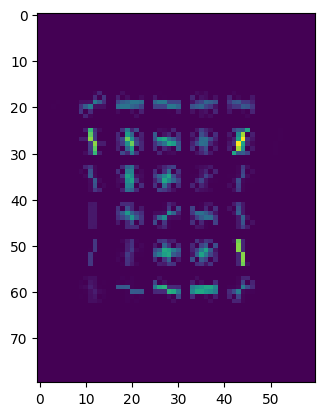

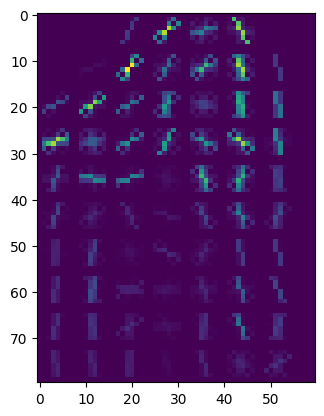

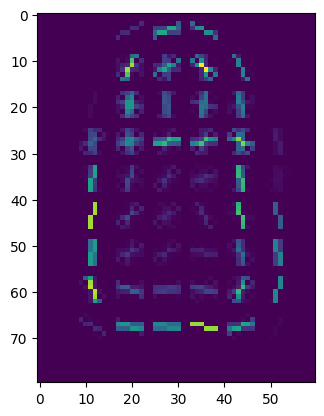

In [16]:
for img in hog_images[:20]:
    plt.imshow(img)
    plt.show()

## Canny Edge

In [17]:
edges = [cv.Canny(image,50,150,apertureSize = 3) for image in train_images]
edges = np.array(edges)
n_samples_edges = len(edges)
edge_images = edges.reshape((n_samples, -1))
edge_images.shape

(19998, 4800)

In [18]:
train_images.shape, hog_features.shape, edge_images.shape

((19998, 80, 60), (19998, 1728), (19998, 4800))

In [19]:
edge_hog = np.hstack([hog_features,edge_images])
edge_hog.shape

(19998, 6528)

## Histogram

In [20]:
histr = [cv.calcHist([img],[0],None,[256],[0,256]) for img in train_images]
histr = np.array(histr)
n_samples_histr = len(histr)
image_hist = histr.reshape((n_samples_histr, -1))
image_hist.shape

(19998, 256)

In [21]:
edge_hog = np.hstack([hog_features,edge_images,image_hist])
edge_hog.shape

(19998, 6784)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(hog_features,df_labels['class'],test_size=0.2,stratify=df_labels['class'])
print('Training data and target sizes: \n{}, {}'.format(X_train.shape,y_train.shape))
print('Test data and target sizes: \n{}, {}'.format(X_test.shape,y_test.shape))

Training data and target sizes: 
(15998, 1728), (15998,)
Test data and target sizes: 
(4000, 1728), (4000,)


In [34]:
y_train.value_counts(),y_test.value_counts()

(class
 0    7740
 1    4063
 2    3297
 3     857
 4      33
 5       8
 Name: count, dtype: int64,
 class
 0    1935
 1    1016
 2     824
 3     215
 4       8
 5       2
 Name: count, dtype: int64)

In [35]:
from sklearn import datasets, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# # Create a classifier: a support vector classifier
# classifier = svm.SVC(gamma=0.001)
# #fit to the trainin data
# classifier.fit(X_train,y_train)

## Training with KNN

In [29]:
!pip install --upgrade numpy scipy scikit-learn threadpoolctl

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\garva\\anaconda3\\Lib\\site-packages\\~umpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.



  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/8c/4a/556406d2bb2b9874c8cbc840c962683ac28f21efbc9b01177d78f0199ca1/numpy-2.3.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.9 kB ? eta -:--:--
     ---------------------------------------- 60.9/60.9 kB 3.2 MB/s eta 0:00:00
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/f4/5a/ba91b8c57aa37dbd80d5ff958576a9a8c14317b04b671ae7f0d09b00993a/scikit_learn-1.7.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for threadpoolctl from https://files.pythonhosted.org/packages/32/d5/f9a850d79b0851d1d4ef6456097579a9005b31fea68726a4ae5f2d82ddd9/threadpoolctl-3.6.0-py3-none-any.whl.metadata
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/13.0 MB ? eta -:--:--
    --------------------------------------- 0.2/13.0 MB 6.3 MB/s eta 0:00:03

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\garva\\anaconda3\\Lib\\site-packages\\~klearn\\datasets\\_svmlight_format_fast.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# use kd_tree (or ball_tree) instead of brute
classifier = KNeighborsClassifier(
    n_neighbors=3,
    algorithm='kd_tree',  # <-- avoids the BLAS path entirely
    n_jobs=1
)
classifier.fit(X_scaled, y_train)
print("Accuracy:", classifier.score(scaler.transform(X_test), y_test))


# #FOR TUNING
# print(search_params)
# for p in tqdm(search_params):
#     #classifier = svm.SVC(gamma=p)
#     classifier = RandomForestClassifier(max_depth=8,n_estimators=600)

#     classifier.fit(X_scaled, y_train)
#     test_accuracy.append([p,classifier.score(scaler.transform(X_test), y_test)])

# df_accuracy = pd.DataFrame(test_accuracy,columns =['gamma','accuracy'])
# df_accuracy.index = df_accuracy.gamma
# df_accuracy[['accuracy']].plot()
# plt.show()

Accuracy: 0.9805


In [26]:
##PCA
#from sklearn.decomposition import PCA
# pca = PCA(.90)
# principalComponents = pca.fit_transform(X = X_scaled)

In [41]:
mapper= mapper.reset_index(drop=True)

## For Debugging

In [42]:
y_pred = classifier.predict(scaler.transform(X_test))

df_result = pd.DataFrame(y_test)
df_result['id'] = df_result.index
df_result = df_result.rename(columns={'class':'actual'})
df_result['predicted'] = y_pred
df_result = df_result.reset_index(drop=True)
df_result = pd.merge(df_result,mapper,left_on='predicted',right_on = 'class',how='inner')
df_result = df_result.drop(columns=['class'],axis=1)
df_result = df_result.rename(columns={'gender':'predicted_category'})

df_result = pd.merge(df_result,mapper,left_on='actual',right_on = 'class',how='inner')
df_result = df_result.drop(columns=['class'],axis=1)
df_result.shape

(4000, 5)

In [43]:
#some references for debugging
kd = df_result[df_result.actual!=df_result.predicted]
print(kd.shape)
kd.head()

(78, 5)


,actual,id,predicted,masterCategory_x,masterCategory_y
1,1,16241,3,Personal Care,Accessories
90,4,1360,1,Accessories,Free Items
129,1,13166,3,Personal Care,Accessories
305,4,826,1,Accessories,Free Items
359,1,5427,3,Personal Care,Accessories


Loaded image shape: (80, 60, 3)


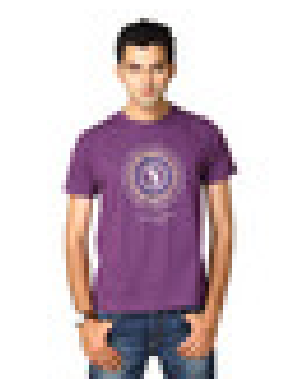

In [49]:
# image_id = styles[styles.index==2663]['id'].reset_index(drop=True)
# k = str(image_id)
# print(k)
#print(image_folder+str(image_id)+'.jpg')

#debug image with id
##it is recommended not to use the image used for training. You can make a separate test folder and check the result
import os
import cv2 as cv
import matplotlib.pyplot as plt

# Build the path properly
root         = 'fashion_product_dataset_unzip'
image_folder = os.path.join(root, 'images')
img_id       = 7347
img_path     = os.path.join(image_folder, f"{img_id}.jpg")


# Attempt to load
img = cv.imread(img_path)
if img is None:
    raise FileNotFoundError(
        f"cv.imread failed! Either the file doesn’t exist or is unreadable:\n  {img_path}"
    )

# Now it’s safe to convert
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
print("Loaded image shape:", img_rgb.shape)

# Display
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [50]:
list_of_categories = categories +['Others']

print("Classification Report: \n Target: %s \n Labels: %s \n Classifier: %s:\n%s\n"
      % (target,list_of_categories,classifier, metrics.classification_report(y_test, y_pred)))

df_report = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred),columns = list_of_categories )
df_report.index = [list_of_categories]
df_report

Classification Report: 
 Target: masterCategory 
 Labels: ['Apparel', 'Accessories', 'Footwear', 'Personal Care', 'Free Items', 'Others'] 
 Classifier: KNeighborsClassifier(algorithm='kd_tree', n_jobs=1, n_neighbors=3):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1935
           1       0.97      0.96      0.97      1016
           2       0.99      1.00      1.00       824
           3       0.90      0.95      0.92       215
           4       0.00      0.00      0.00         8
           5       0.00      0.00      0.00         2

    accuracy                           0.98      4000
   macro avg       0.64      0.65      0.65      4000
weighted avg       0.98      0.98      0.98      4000




,Apparel,Accessories,Footwear,Personal Care,Free Items,Others
Apparel,1917,11,2,5,0,0
Accessories,17,978,3,18,0,0
Footwear,0,1,822,1,0,0
Personal Care,2,6,0,205,0,2
Free Items,2,6,0,0,0,0
Others,0,2,0,0,0,0


In [52]:
import os
import cv2 as cv
import numpy as np
from skimage.feature import hog

# 1) Make sure your paths are right:
root          = 'fashion_product_dataset_unzip'
image_folder  = os.path.join(root, 'images')
test_img_id   = 2093
img_path      = os.path.join(image_folder, f"{test_img_id}.jpg")

print("Looking for:", img_path)
if not os.path.exists(img_path):
    raise FileNotFoundError(f"No such test file: {img_path}")

# 2) Load in grayscale
img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
if img is None:
    raise RuntimeError(f"cv.imread failed on {img_path} — maybe corrupt or unsupported format")

# 3) Resize once we know img is valid
image = cv.resize(img, (60, 80), interpolation=cv.INTER_LINEAR)

# 4) Compute HOG
ppcr = 8
ppcc = 8
hog_images_test   = []
hog_features_test = []

blur = cv.GaussianBlur(image, (5,5), 0)
fd_test, hog_img = hog(
    blur,
    orientations=8,
    pixels_per_cell=(ppcr, ppcc),
    cells_per_block=(2,2),
    block_norm='L2',
    visualize=True
)

hog_images_test.append(hog_img)
hog_features_test.append(fd_test)      # <-- use fd_test, not fd

hog_features_test = np.array(hog_features_test)

# 5) Predict
X_test_scaled = scaler.transform(hog_features_test)
y_pred_user   = classifier.predict(X_test_scaled)

print("Raw prediction:", y_pred_user)
print(
    "Predicted MasterCategory:",
    mapper.loc[mapper['class'] == int(y_pred_user), 'masterCategory'].values
)


Looking for: fashion_product_dataset_unzip\images\2093.jpg
Raw prediction: [0]
Predicted MasterCategory: ['Apparel']


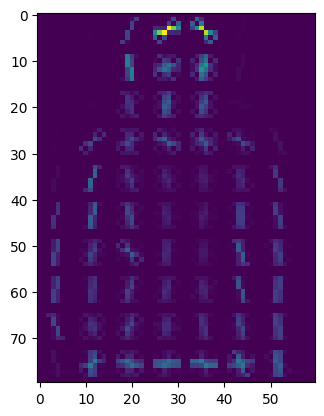

In [53]:
#test image HOG
plt.imshow(hog_img)
plt.show()

In [55]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

# scale your global HOG feature matrix
scaler_global      = MinMaxScaler()
final_features_scaled = scaler_global.fit_transform(hog_features)

# build a KD-tree index instead of brute
neighbors_model = NearestNeighbors(
    n_neighbors=20,
    algorithm='kd_tree'   # or 'ball_tree'
)
neighbors_model.fit(final_features_scaled)

# query on your test HOG features
distances, indices = neighbors_model.kneighbors(
    scaler_global.transform(hog_features_test)
)

recommendation_list = df_labels.iloc[indices[0]]['id'].tolist()
print("Recommendations:", recommendation_list)

Recommendations: [2103, 2025, 2102, 2097, 2126, 2166, 2012, 2001, 2168, 2478, 2159, 2157, 2128, 11040, 2142, 2014, 1995, 2169, 2242, 1897]
